In [19]:
### MAGNI

MAGNI_NLL = [
    1.903848129886274,
    1.7458066030960662,
    1.6645313219909466,
    1.60585251971006,
    1.564322873020846,
    1.533528582104179,
    1.5163760152948247,
    1.5087700194483837,
    1.5162716508926974,
]

### ATC v1
# ATC_NLL = [
#     1.4984236348810183,
#     1.496143591694191,
#     1.49624500647158,
#     1.498854270610116,
#     1.504984146018804,
#     1.5119168996028154,
#     1.5183534281215771,
#     1.5295658102464444,
#     1.5409336229037998,
# ]

ATC_NLL = [
    1.1849602300825255,
    1.1859036113476822,
    1.2038236167784808,
    1.227731543002714,
    1.2550674327493196,
    1.285300616175459,
    1.3137307929438788,
    1.3449185991432502,
    1.3748946264640265,
]


### For different hour in decay_rate = 0.5
ATC_hour =[
    (1.3367014493660443, 7),
    (1.913691223159894,  4),
    (1.3641077645021402, 0),
    (1.3667235588983262, 0),
    (1.5683461478398761,31),
    (1.4900533930814093, 0),
    (1.4383554304906205, 1),
    (1.5009120502272126, 0),
    (1.6513539419905363, 1),
    (1.5228280981621056, 0),
    (1.3786949209089308, 0),
    (1.2550674327493196, 0),
]

### MAPF

MAPF_NLL = [
    1.5641237957128744,
    1.5125021194264565,
    1.4523238996028838,
    1.424992324830232,
    1.4160769868010552,
    1.4077848796639723,
    1.4281715202964256,
    1.4454045673630918,
    1.4869902355537172,
]

/tmp/ipykernel_2909963/2937714931.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotli

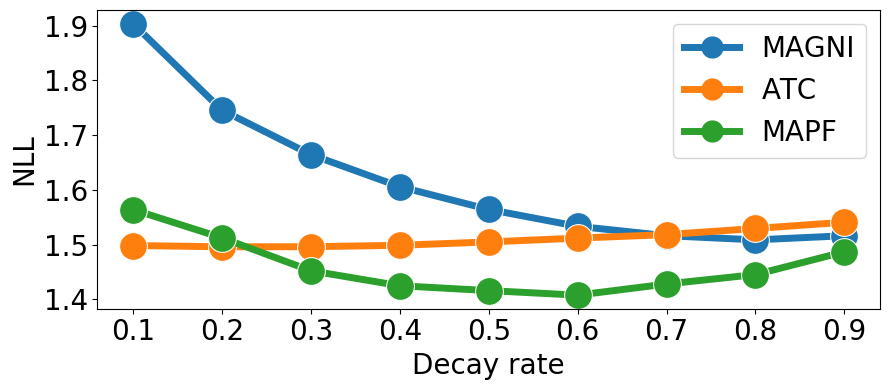

In [43]:
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

nll = MAGNI_NLL

decay_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

data = {
    'Sequence': decay_rate,
    'MAGNI': MAGNI_NLL,
    'ATC': ATC_NLL,
    'MAPF': MAPF_NLL,
}
df = pd.DataFrame(data)

# Melting the DataFrame to 'long format'
# df_long = df.melt('Sequence', var_name='Type', value_name='NLL')
df_long = df.melt('Sequence', var_name='Series', value_name='NLL')

# Creating the plot with Seaborn
plt.figure(figsize=(9, 4))
ax = sns.lineplot(
    data=df_long, 
    x='Sequence', 
    y='NLL',  
    marker='o',
    hue='Series',
    # style='Type',
    markersize=20,  # Increase marker size
    linewidth=5,   # Increase line width
    ci=None
)

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[:], labels=labels[:], title='', fontsize='20', title_fontsize='13', loc='upper right')

handles, labels = ax.get_legend_handles_labels()
new_handles = [plt.Line2D([], [], marker='o', linestyle='-', color=handle.get_color(), markersize=15, linewidth=5) for handle in handles]
ax.legend(handles=new_handles, labels=labels, title='', fontsize='20', title_fontsize='13', loc='upper right')


# ax.set_yscale('log')
plt.xlabel('Decay rate', fontsize=20)
plt.ylabel('NLL', fontsize=20)
# legend = plt.legend(fontsize='x-large')  # You can specify 'small', 'medium', 'large', 'x-large', etc.
# for handle in legend.legendHandles:
#     handle.set_markersize(10)  # Set a larger size for markers
#     handle.set_marker('o')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.grid(True)
# plt.show()
plt.tight_layout()

plt.savefig('rebuttal_figure/decay_all.png')
plt.savefig('rebuttal_figure/decay_all.pdf')

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


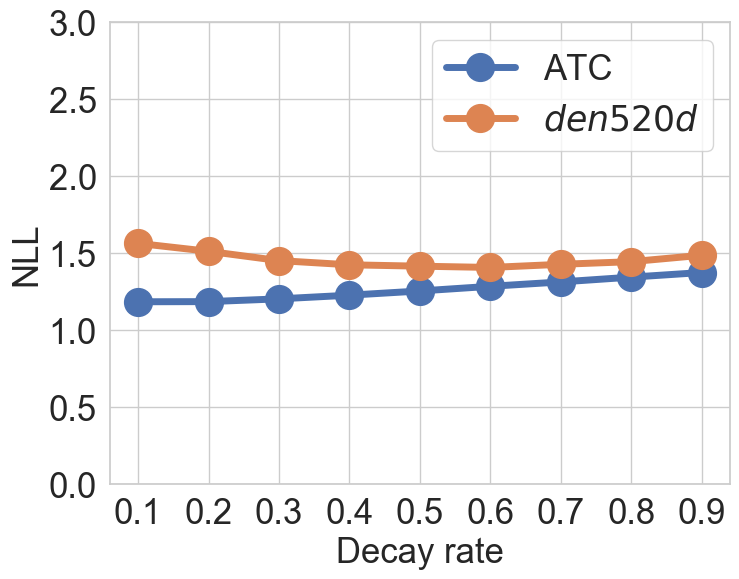

In [33]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_errorbar_decay_rate_NLL():
    # Load your data
    file_name = "online_mod_res_atc/try7/atc_online_decay_rate.txt"
    df1 = pd.read_csv(file_name, header=None)
    df1.columns = ['decay_rate', 'NLL_mean', 'NLL_std', 'no_find']
    
    # file_name = "magni-res-v2/try7/online_try5.txt"
    # df2 = pd.read_csv(file_name)
    # df2.columns = ['decay_rate', 'NLL_mean', 'NLL_std', 'no_find']
    
    file_name = "online_mod_res_mapf/try7/mapf_benchmark_online.txt"
    df3 = pd.read_csv(file_name, header=None)
    df3.columns = ['decay_rate', 'NLL_mean', 'NLL_std', 'no_find']

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42

    plt.rcParams['text.usetex'] = False
    sns.set_theme(style="whitegrid")

    # Define offsets
    offset = 0.01  # adjust spacing depending on how much you want them to overlap
    x = df1['decay_rate']

    # plt.errorbar(x, df1['NLL_mean'], yerr=df1['NLL_std'], fmt='-o', label='ATC', capsize=5, capthick=2, elinewidth=3, markersize=10)
    # # plt.errorbar(x, df2['NLL_mean'], yerr=df2['NLL_std'], fmt='-o', label='MAGNI', capsize=5, capthick=2, elinewidth=2)
    # plt.errorbar(x + offset, df3['NLL_mean'], yerr=df3['NLL_std'], fmt='-o', label=r'$\mathit{den520d}$', capsize=5, capthick=2, elinewidth=3, markersize=10)
    
    
    plt.plot(df1['decay_rate'], df1['NLL_mean'], '-o', label='ATC', markersize=20, linewidth=5)
    plt.plot(df3['decay_rate'], df3['NLL_mean'], '-o', label=r'$\mathit{den520d}$', markersize=20, linewidth=5)
    
    
    plt.legend(fontsize=25, loc='upper right')
    plt.ylim(0, 3)
    plt.xlabel("Decay rate", fontsize=25)
    plt.ylabel('NLL', fontsize=25)

    plt.yticks(fontsize=25)
    plt.xticks(fontsize=25)
    plt.savefig(f"rebuttal_figure/decay_for_icra.pdf", bbox_inches="tight")
    

plot_errorbar_decay_rate_NLL()


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


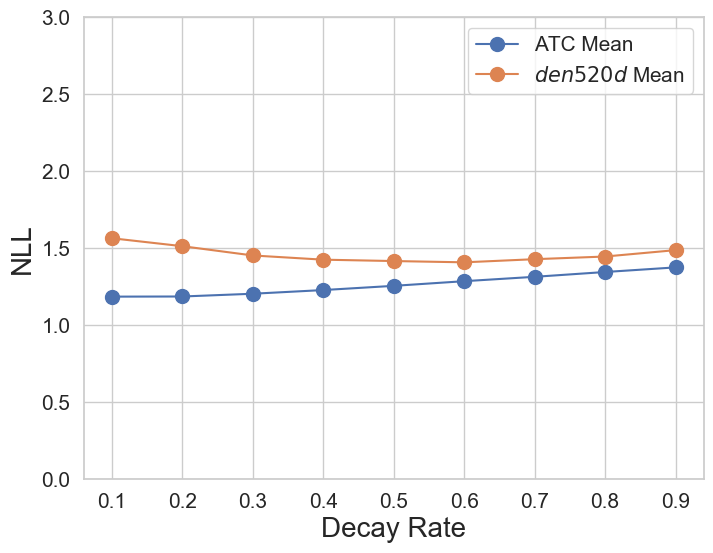

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_stats():
    # Load your data
    file_name = "online_mod_res_atc/try7/atc_online_decay_rate.txt"
    df1 = pd.read_csv(file_name, header=None)
    df1.columns = ['decay_rate', 'NLL_mean', 'NLL_std', 'no_find']
    
    file_name = "online_mod_res_mapf/try7/mapf_benchmark_online.txt"
    df3 = pd.read_csv(file_name, header=None)
    df3.columns = ['decay_rate', 'NLL_mean', 'NLL_std', 'no_find']

    # Calculate max and min values (assuming they need to be calculated)
    # df1['NLL_max'] = df1['NLL_mean'] + df1['NLL_std']
    # df1['NLL_min'] = df1['NLL_mean'] - df1['NLL_std']
    # df3['NLL_max'] = df3['NLL_mean'] + df3['NLL_std']
    # df3['NLL_min'] = df3['NLL_mean'] - df3['NLL_std']

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.rcParams.update({'pdf.fonttype': 42, 'ps.fonttype': 42, 'text.usetex': False})

    plt.plot(df1['decay_rate'], df1['NLL_mean'], '-o', label='ATC Mean', markersize=10)
    # plt.scatter(df1['decay_rate'], df1['NLL_max'], color='red', label='ATC Max', s=100)  # s is size of scatter point
    # plt.scatter(df1['decay_rate'], df1['NLL_min'], color='blue', label='ATC Min', s=100)

    plt.plot(df3['decay_rate'], df3['NLL_mean'], '-o', label=r'$\mathit{den520d}$ Mean', markersize=10)
    # plt.scatter(df3['decay_rate'], df3['NLL_max'], color='red', label=r'$\mathit{den520d}$ Max', s=100)
    # plt.scatter(df3['decay_rate'], df3['NLL_min'], color='blue', label=r'$\mathit{den520d}$ Min', s=100)

    plt.legend(fontsize=15, loc='upper right')
    plt.xlabel("Decay Rate", fontsize=20)
    plt.ylabel('NLL', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylim(0, 3)
    
    plt.savefig("rebuttal_figure/decay_stats_icra.pdf", bbox_inches="tight")

plot_stats()


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


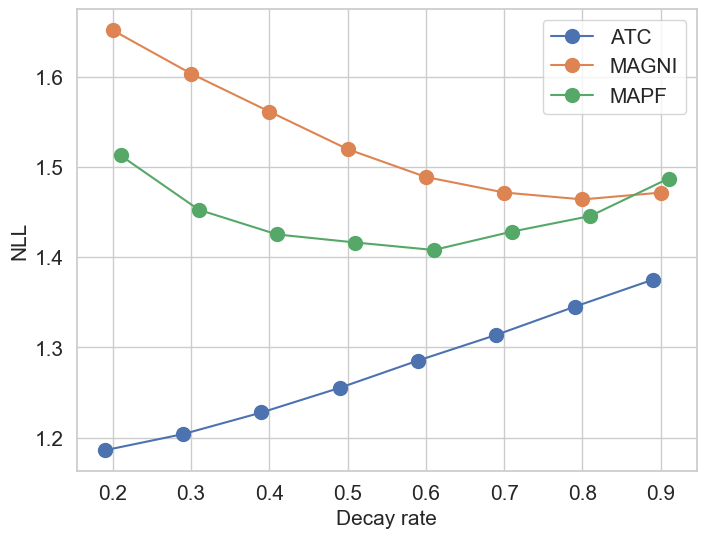

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_decay_rate_NLL():
    # Load your data
    file_name = "online_mod_res_atc/try7/atc_online_total.txt"
    df1 = pd.read_csv(file_name)
    df1.columns = ['decay_rate', 'NLL_mean', 'NLL_std', 'no_find']
    
    file_name = "magni-res-v2/try7/online_try5.txt"
    df2 = pd.read_csv(file_name)
    df2.columns = ['decay_rate', 'NLL_mean', 'NLL_std', 'no_find']
    
    file_name = "online_mod_res_mapf/try7/mapf_benchmark_online.txt"
    df3 = pd.read_csv(file_name)
    df3.columns = ['decay_rate', 'NLL_mean', 'NLL_std', 'no_find']

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42

    # Define offsets
    offset = 0.01  # adjust spacing depending on how much you want them to overlap
    x = df1['decay_rate']

    plt.plot(x - offset, df1['NLL_mean'], 'o-', label='ATC', markersize=10)
    plt.plot(x, df2['NLL_mean'], 'o-', label='MAGNI', markersize=10)
    plt.plot(x + offset, df3['NLL_mean'], 'o-', label='MAPF', markersize=10)
    plt.legend(fontsize=15)

    plt.xlabel("Decay rate", fontsize=15)
    plt.ylabel('NLL', fontsize=15)

    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.savefig(f"rebuttal_figure/decay_for_icra.pdf", bbox_inches="tight")

plot_decay_rate_NLL()
